In [12]:
# 필요한 패키지 설치
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
plt.rcParams['figure.dpi'] = 150

# 데이터 로드
data = pd.read_csv('Seoul_real_estate_trade_info.csv', encoding='cp949')

/var/folders/1q/v9gxtgcn3bl6qw0ln1qykht40000gp/T/ipykernel_1053/4168070895.py:10: DtypeWarning: Columns (7,15,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Seoul_real_estate_trade_info.csv', encoding='cp949')


In [13]:
# 데이터 살펴보기
data.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2023,11590,동작구,10200,상도동,1.0,대지,175.0,27.0,모던힐타운2차,...,40000,43.64,27.49,4.0,NaN,NaN,2015.0,연립다세대,중개거래,서울 동작구
1,2023,11140,중구,15600,입정동,1.0,대지,189.0,1.0,힐스테이트 세운 센트럴 1단지,...,32550,25.07,0.00,20.0,분양권,NaN,0.0,아파트,직거래,NaN
2,2023,11530,구로구,11000,온수동,1.0,대지,86.0,10.0,에코그린빌,...,29500,43.91,35.11,5.0,NaN,NaN,2019.0,연립다세대,직거래,NaN
3,2023,11230,동대문구,10400,전농동,1.0,대지,620.0,47.0,청량리역 롯데캐슬 SKY-L65,...,109000,84.97,0.00,13.0,분양권,NaN,0.0,아파트,중개거래,서울 동대문구
4,2023,11410,서대문구,11200,대현동,1.0,대지,37.0,32.0,영타운 지웰 에스테이트,...,16000,19.39,30.27,9.0,NaN,NaN,2017.0,오피스텔,중개거래,서울 마포구


In [14]:
# 데이터 살펴보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651626 entries, 0 to 2651625
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   접수연도              int64  
 1   자치구코드             int64  
 2   자치구명              object 
 3   법정동코드             int64  
 4   법정동명              object 
 5   지번구분              float64
 6   지번구분명             object 
 7   본번                object 
 8   부번                float64
 9   건물명               object 
 10  계약일               int64  
 11  물건금액(만원)          int64  
 12  건물면적(㎡)           float64
 13  토지면적(㎡)           float64
 14  층                 float64
 15  권리구분              object 
 16  취소일               float64
 17  건축년도              float64
 18  건물용도              object 
 19  신고구분              object 
 20  신고한 개업공인중개사 시군구명  object 
dtypes: float64(7), int64(5), object(9)
memory usage: 424.8+ MB


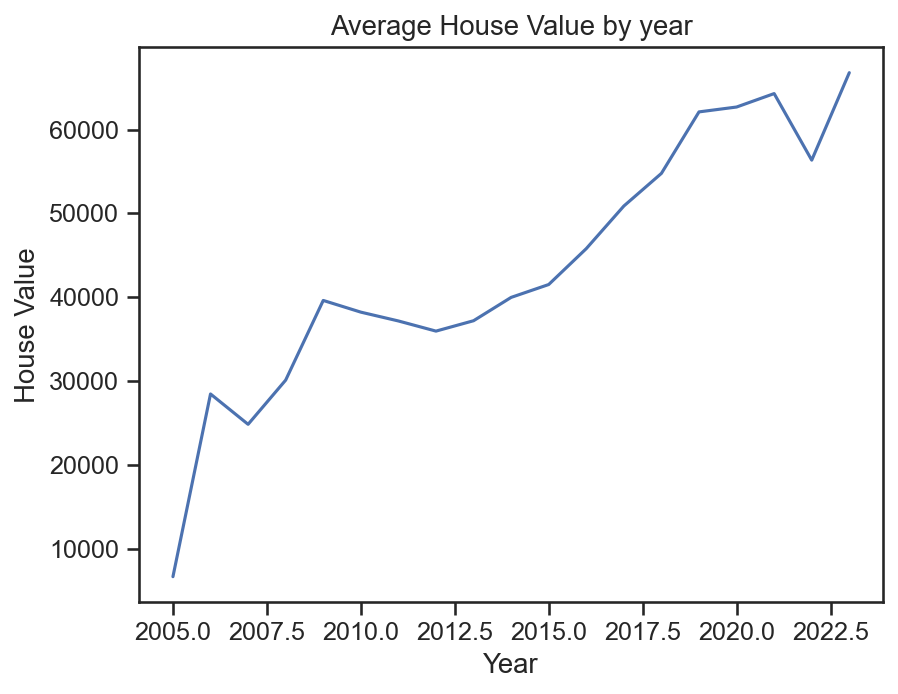

In [15]:
# 접수 연도별 거래가
mean_value_by_year = data.groupby(data['접수연도'])['물건금액(만원)'].mean()

# 그래프 그리기
plt.plot(mean_value_by_year.index, mean_value_by_year.values)
plt.title('Average House Value by year')
plt.xlabel('Year')
plt.ylabel('House Value')
plt.show()

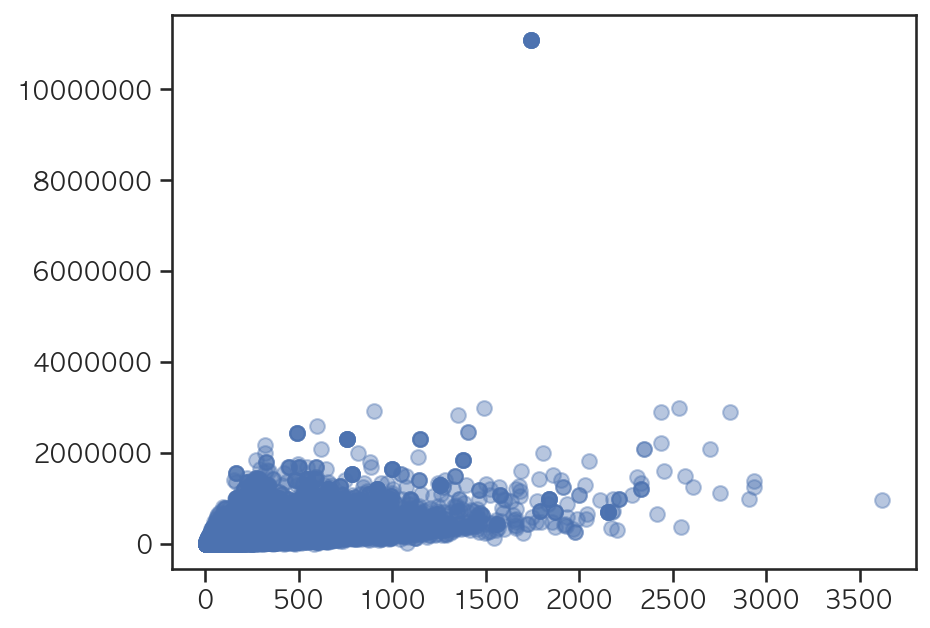

In [26]:
plt.scatter(data['건물면적(㎡)'], data['물건금액(만원)'], s = 50, alpha = 0.4)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

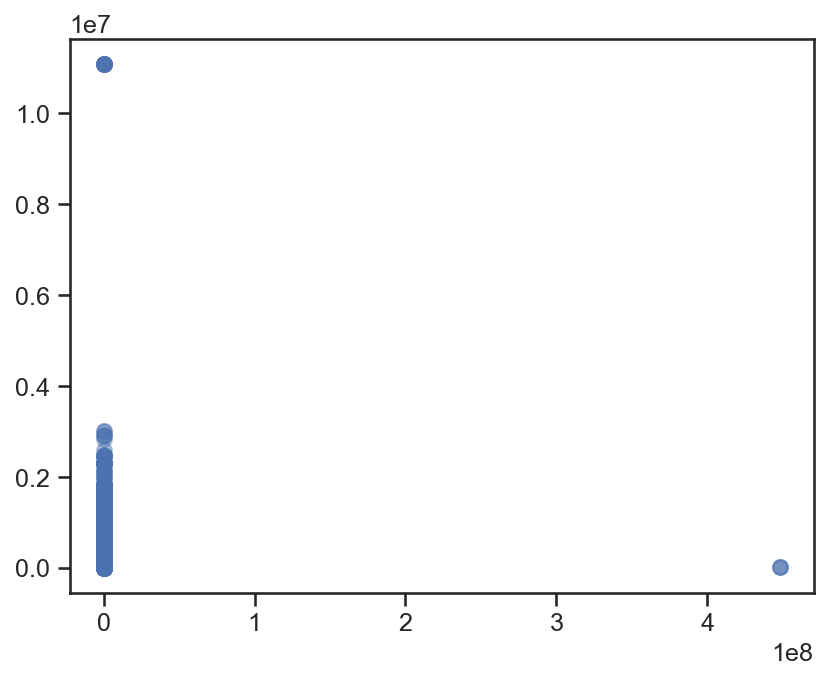

In [18]:
plt.scatter(data['토지면적(㎡)'], data['물건금액(만원)'], s = 50, alpha = 0.4)
plt.show()

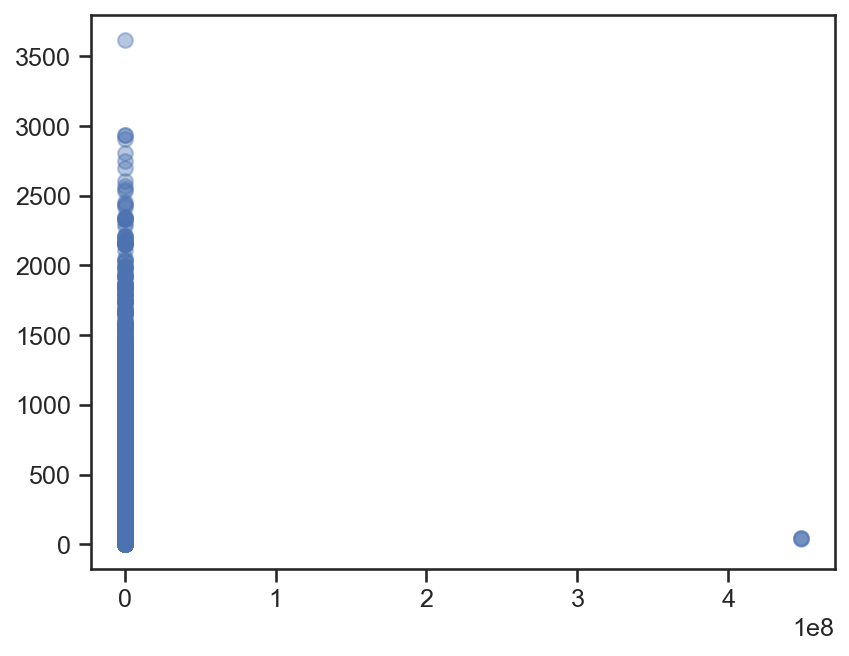

In [19]:
plt.scatter(data['토지면적(㎡)'], data['건물면적(㎡)'], s = 50, alpha = 0.4)
plt.show()

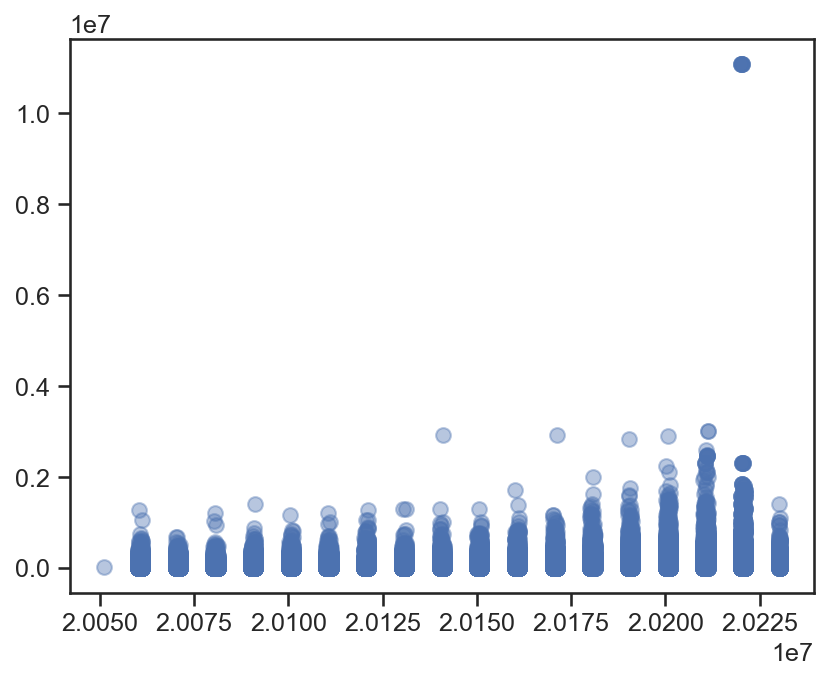

In [20]:
plt.scatter(data['계약일'], data['물건금액(만원)'], s = 50, alpha = 0.4)
plt.show()

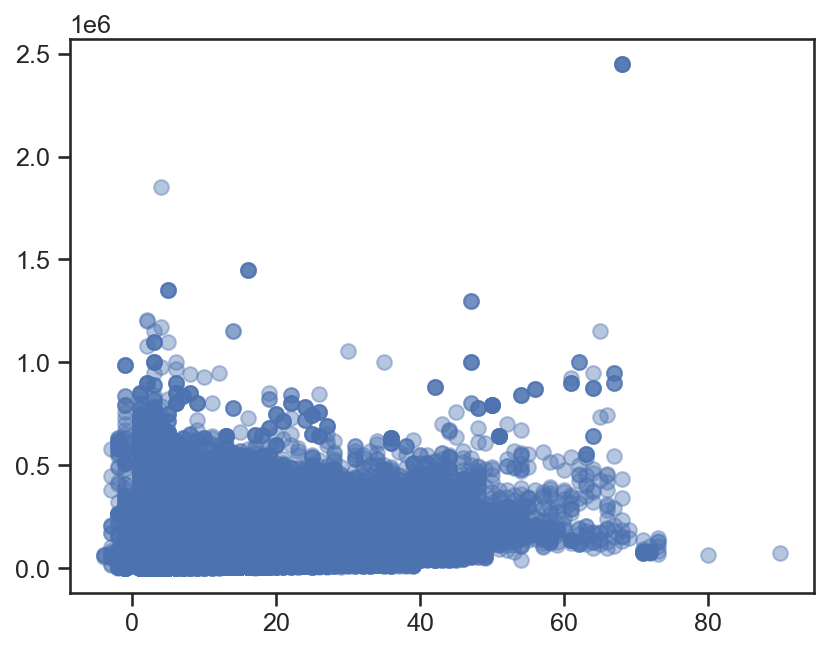

In [21]:
plt.scatter(data['층'], data['물건금액(만원)'], s = 50, alpha = 0.4)
plt.show()

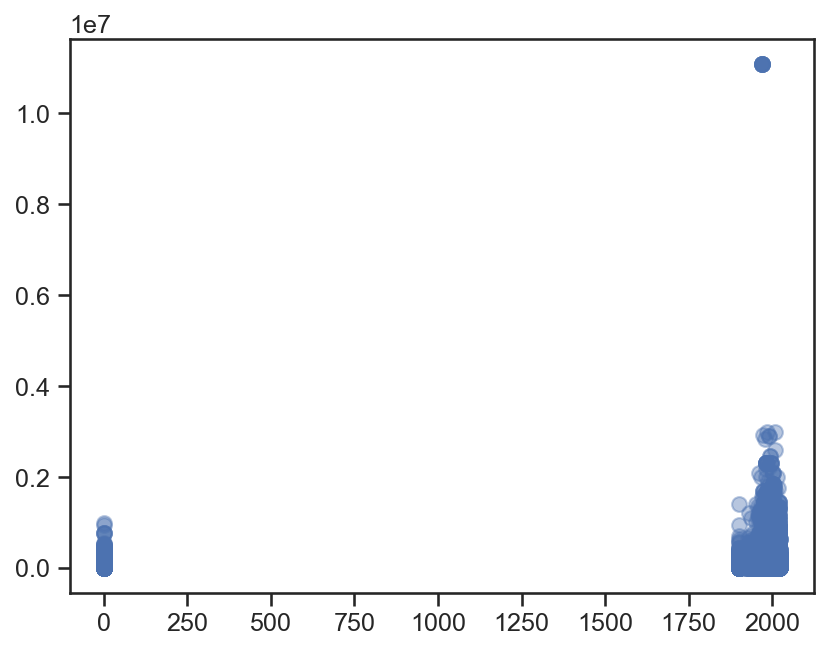

In [22]:
plt.scatter(data['건축년도'], data['물건금액(만원)'], s = 50, alpha = 0.4)
plt.show()

/var/folders/1q/v9gxtgcn3bl6qw0ln1qykht40000gp/T/ipykernel_1053/300732869.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data.corr(),
/Users/min/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


/Users/min/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/min/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


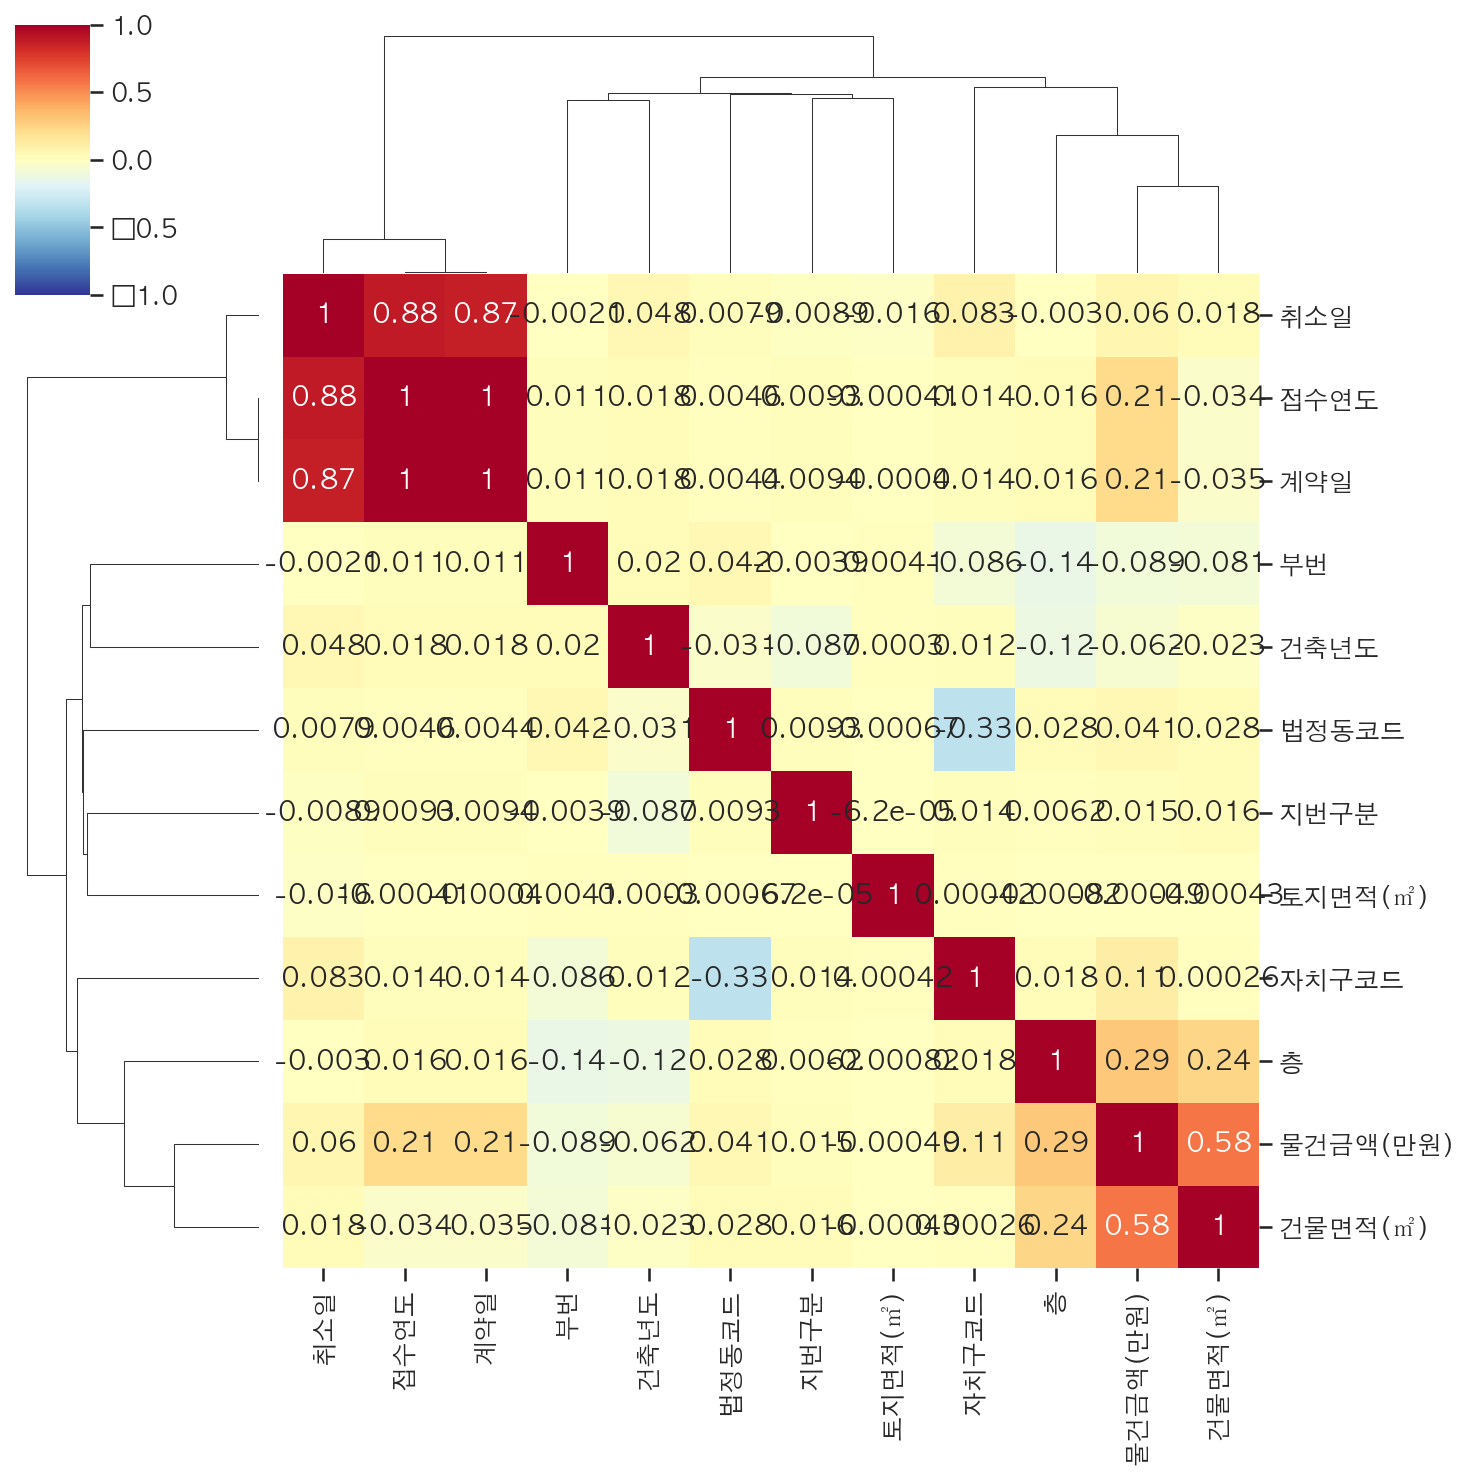

In [25]:
# 히트맵 시각화
plt.rcParams['font.family'] = 'AppleGothic'
sns.clustermap(data.corr(), 
               annot = True,      
               cmap = 'RdYlBu_r',  
               vmin = -1, vmax = 1,
              )

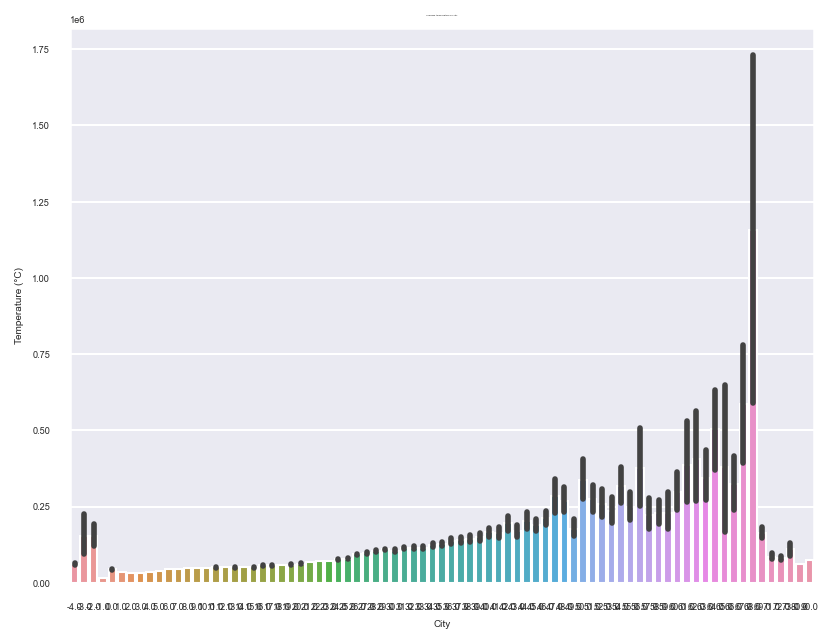

In [28]:
# 도시 별 온도 bar plot 시각화

sns.barplot(x="층", y="물건금액(만원)", data=data)
sns.set(font_scale=0.1)
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.title("Average temperature by city")
plt.show()

In [31]:
import folium

total_price_by_gu = data.groupby('자치구명')['물건금액(만원)'].sum().reset_index()

eoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/southkorea-maps/main/kostat/2018/json/skorea_submunicipalities_geo_simple.json',
    name='choropleth',
    data=total_price_by_gu,
    columns=['자치구명', '물건금액(만원)'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='자치구별 실거래가(만원)',
).add_to(seoul_map)

folium.LayerControl().add_to(seoul_map)

seoul_map.save('seoul_real_estate.html')

JSONDecodeError: Extra data: line 1 column 4 (char 3)